In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# You will need to excute 'Step2 - Data wrangling.ipynb' first to get the dataset after pre-processing. 
df=pd.read_csv("Falcon_9.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Landing
0,6,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,False Ocean,1,0,0,0,None,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Landing
0,6,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,False Ocean,1,0,0,0,None,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,181,2022-08-28,Falcon 9,13260.00000,VLEO,KSC LC 39A,True ASDS,2,1,1,1,5e9e3033383ecb075134e7cd,5.0,1,B1069,-80.603956,28.608058,1
163,182,2022-08-31,Falcon 9,13260.00000,VLEO,VAFB SLC 4E,True ASDS,7,1,1,1,5e9e3032383ecb6bb234e7ca,5.0,6,B1063,-120.610829,34.632093,1
164,185,2022-09-17,Falcon 9,13260.00000,VLEO,CCSFS SLC 40,True ASDS,6,1,1,1,5e9e3033383ecbb9e534e7cc,5.0,5,B1067,-80.577366,28.561857,1
165,186,2022-09-24,Falcon 9,13260.00000,VLEO,CCSFS SLC 40,True ASDS,4,1,1,1,5e9e3033383ecbb9e534e7cc,5.0,0,B1072,-80.577366,28.561857,1


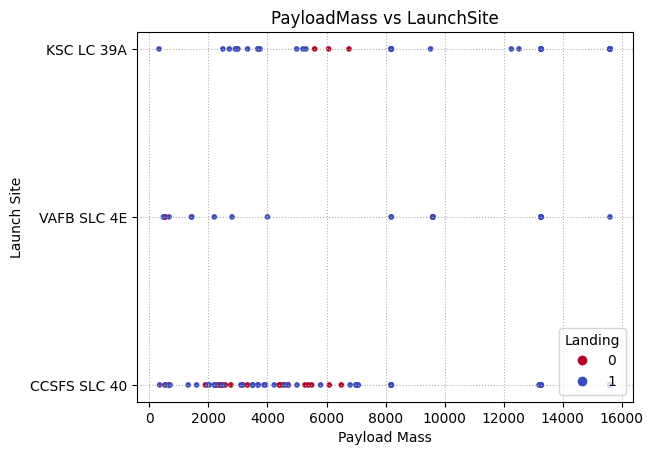

In [4]:
# Visualize the relationship between payload mass and launch site along with landing class, success or unsuccess. 
fig, ax=plt.subplots()
ax.grid(linestyle='dotted')
f2=ax.scatter(y=df["LaunchSite"], x=df["PayloadMass"],c=df['Landing'],cmap='coolwarm_r',marker='.')
ax.legend(*f2.legend_elements(num=1), loc='lower right',title='Landing')
ax.set_xlabel("Payload Mass")
ax.set_ylabel("Launch Site")
ax.set_title("PayloadMass vs LaunchSite")
plt.show()

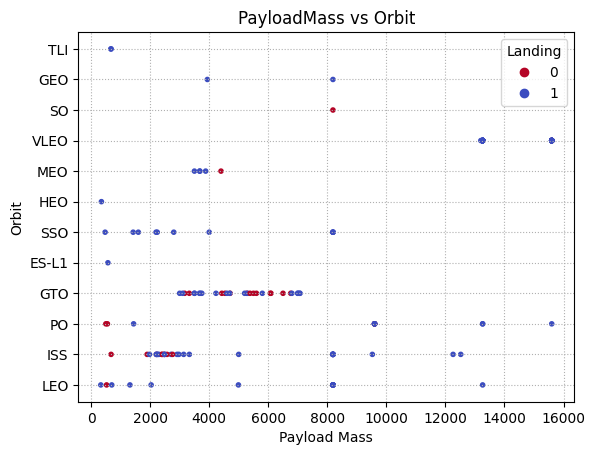

In [5]:
# Visualize the relationship between payload mass and orbit types along with landing class, success or unsuccess. 
fig, ax=plt.subplots()
ax.grid(linestyle='dotted')
f3=ax.scatter(y=df["Orbit"].astype(str), x=df["PayloadMass"],c=df['Landing'],cmap='coolwarm_r',marker='.')
ax.legend(*f3.legend_elements(num=1),loc='upper right',title='Landing')
ax.set_xlabel("Payload Mass")
ax.set_ylabel("Orbit")
ax.set_title("PayloadMass vs Orbit")
plt.show()

/tmp/ipykernel_622806/1866390470.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Orbit").mean()['Landing'].plot(kind='barh')


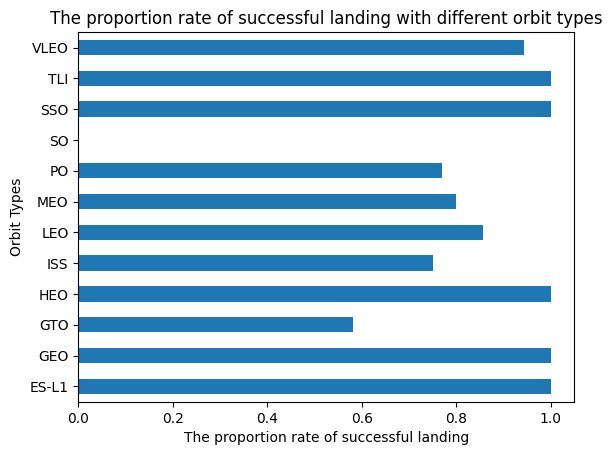

In [6]:
# Comparing the proportion rate of successful landing with different orbit types.
df.groupby("Orbit").mean()['Landing'].plot(kind='barh')
plt.xlabel("The proportion rate of successful landing")
plt.ylabel("Orbit Types")
plt.title("The proportion rate of successful landing with different orbit types")
plt.show()

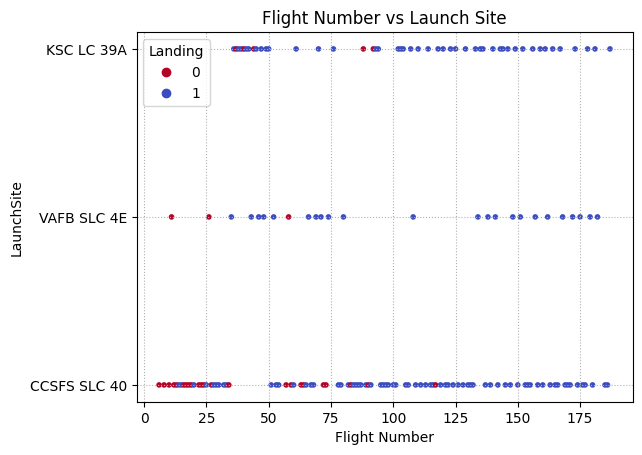

In [7]:
# Visualize the relationship between flight number and launch site along with landing class, success or unsuccess.
fig, ax=plt.subplots()
ax.grid(linestyle='dotted')
f5=ax.scatter(y=df["LaunchSite"], x=df["FlightNumber"],c=df['Landing'],cmap='coolwarm_r',marker='.')
ax.legend(*f5.legend_elements(num=1),loc='upper left',title='Landing')
ax.set_xlabel("Flight Number")
ax.set_ylabel("LaunchSite")
ax.set_title("Flight Number vs Launch Site")
plt.show()

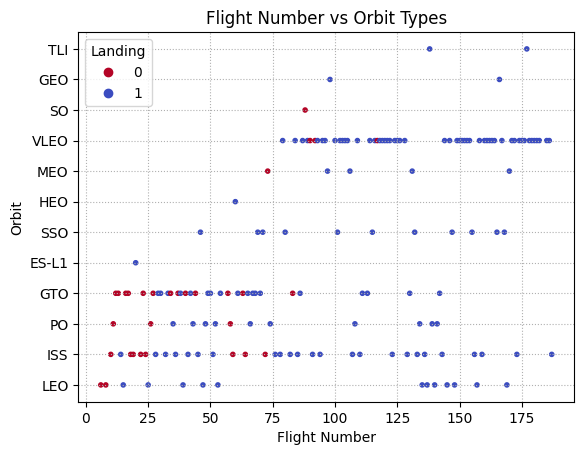

In [8]:
# Visualize the relationship between flight number and orbit types along with landing class, success or unsuccess.
fig, ax=plt.subplots()
ax.grid(linestyle='dotted')
f6=ax.scatter(y=df["Orbit"].astype(str), x=df["FlightNumber"],c=df['Landing'],cmap='coolwarm_r',marker='.')
ax.legend(*f6.legend_elements(num=1),loc='upper left',title='Landing')
ax.set_xlabel("Flight Number")
ax.set_ylabel("Orbit")
ax.set_title("Flight Number vs Orbit Types")
plt.show()

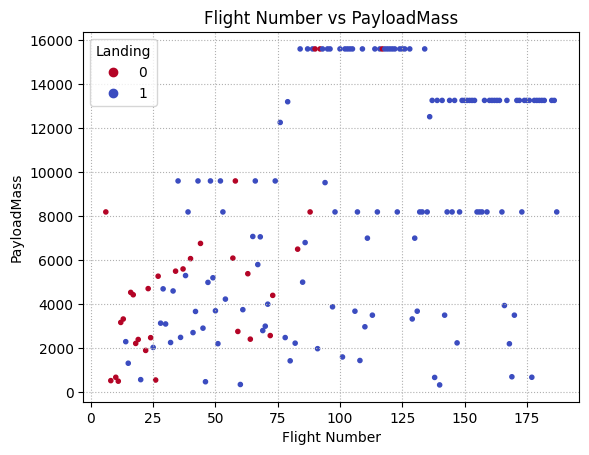

In [9]:
# Visualize the relationship between flight number and payload mass along with landing class, success or unsuccess.
fig, ax=plt.subplots()
ax.grid(linestyle='dotted')
f7=ax.scatter(y=df["PayloadMass"], x=df["FlightNumber"],c=df['Landing'],cmap='coolwarm_r',marker='.')
ax.legend(*f7.legend_elements(num=1),loc='upper left',title='Landing')
ax.set_xlabel("Flight Number")
ax.set_ylabel("PayloadMass")
ax.set_title("Flight Number vs PayloadMass")
plt.show()

In [10]:
# Extract year from date column.
year=[]
for i in df["Date"]:
    year.append(i.split("-")[0])
df_year=pd.DataFrame(year,columns =['Year'])
df_year['Landing']=df['Landing']
df_year.head(5)

,Year,Landing
0,2010,0
1,2012,0
2,2013,0
3,2013,0
4,2013,0


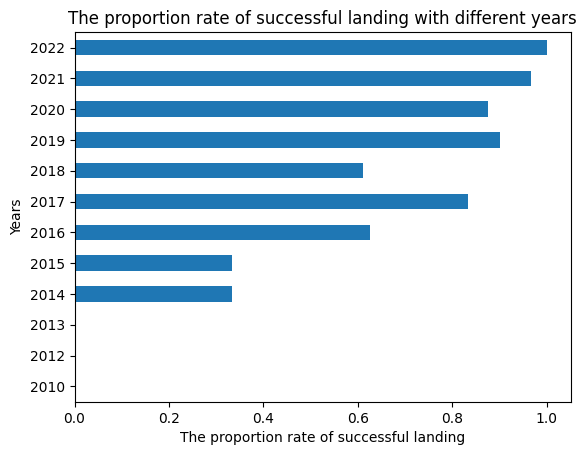

In [11]:
# Comparing the proportion rate of successful landing with different years.
df_year.groupby("Year").mean()['Landing'].plot(kind='barh')
plt.xlabel("The proportion rate of successful landing")
plt.ylabel("Years")
plt.title("The proportion rate of successful landing with different years")
plt.show()

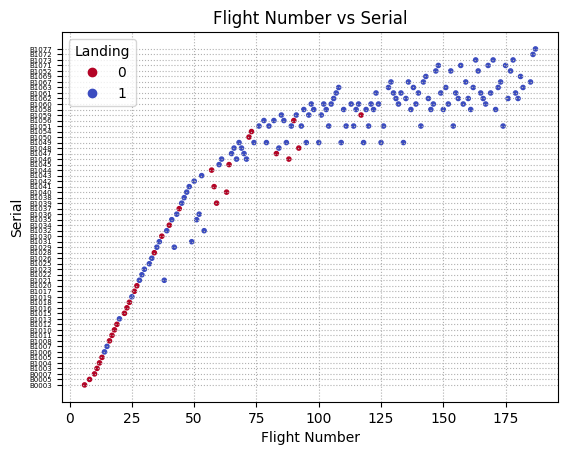

In [12]:
fig, ax=plt.subplots()
ax.grid(linestyle='dotted')
f8=ax.scatter(y=df["Serial"], x=df["FlightNumber"],c=df['Landing'],cmap='coolwarm_r',marker='.')
ax.legend(*f8.legend_elements(num=1),loc='upper left',title='Landing')
ax.set_xlabel("Flight Number")
ax.set_ylabel("Serial")
plt.yticks(fontsize=5)
ax.set_title("Flight Number vs Serial")
plt.show()

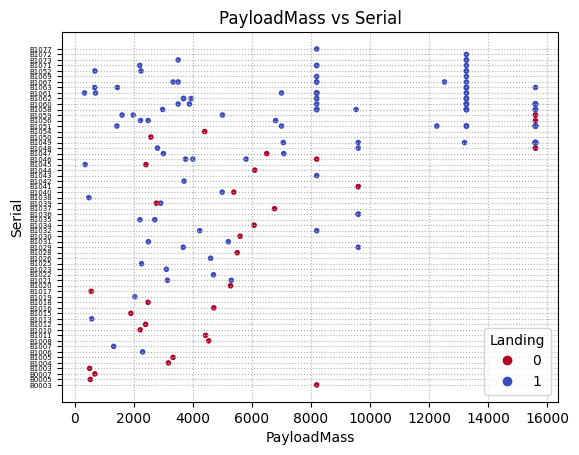

In [13]:
fig, ax=plt.subplots()
ax.grid(linestyle='dotted')
f9=ax.scatter(y=df["Serial"], x=df["PayloadMass"],c=df['Landing'],cmap='coolwarm_r',marker='.')
ax.legend(*f9.legend_elements(num=1),loc='lower right',title='Landing')
ax.set_xlabel("PayloadMass")
ax.set_ylabel("Serial")
plt.yticks(fontsize=5)
ax.set_title("PayloadMass vs Serial")
plt.show()

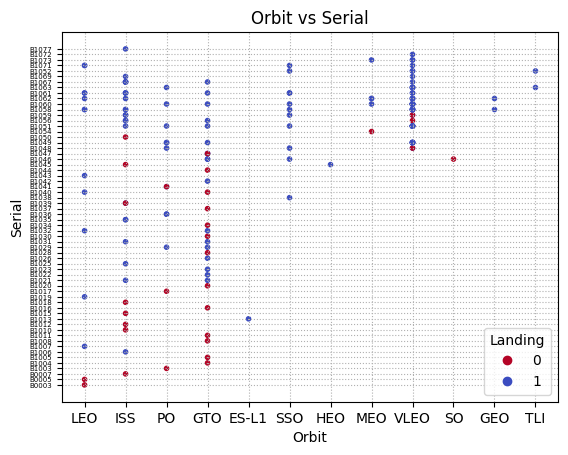

In [14]:
fig, ax=plt.subplots()
ax.grid(linestyle='dotted')
f10=ax.scatter(y=df["Serial"], x=df["Orbit"].astype(str),c=df['Landing'],cmap='coolwarm_r',marker='.')
ax.legend(*f10.legend_elements(num=1),loc='lower right',title='Landing')
ax.set_xlabel("Orbit")
ax.set_ylabel("Serial")
plt.yticks(fontsize=5)
ax.set_title("Orbit vs Serial")
plt.show()

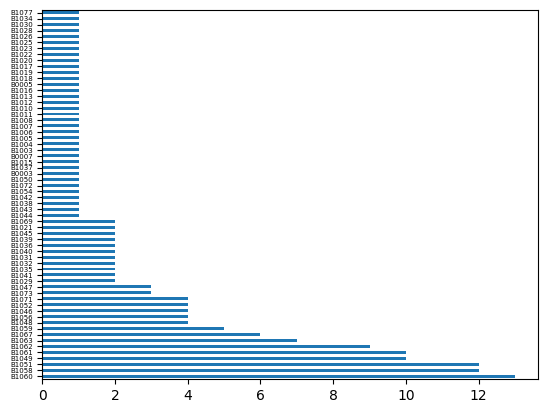

In [19]:
df['Serial'].value_counts().plot(kind='barh')
plt.yticks(fontsize=5)
plt.show()

In [16]:
df['Reused'].value_counts()

1    107
0     60
Name: Reused, dtype: int64

In [17]:
df['Landing'].value_counts()

1    136
0     31
Name: Landing, dtype: int64